In [1]:
import radiomics
from radiomics import featureextractor
import six, numpy as np
import SimpleITK as sitk
import seaborn as sns
# from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import pandas as pd
import os
import shutil
import yaml
from sklearn.metrics import accuracy_score, precision_recall_curve, confusion_matrix, f1_score
# Load the important packages
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



0025961
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


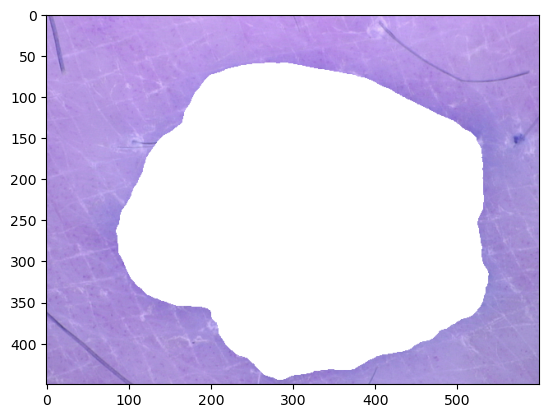

In [ ]:


image_dir = '../dataset/images/'
# im_n = imgPath
imagepath = image_dir+'/ISIC_' #0024310.jpg'
labelpath = '../dataset/HAM10000_segmentations_lesion_tschandl/ISIC_' #0024310_segmentation.png'

features ={}
im_n=['../dataset/images/ISIC_0025961.jpg']
for i in range(1):
    img = sitk.ReadImage(im_n[i])
    ll = im_n[i].split('_')[1].split('.')[0]
    print(ll)
    # print(str(labelPath), type(ll))
    imagePAth = imagepath+str(ll)+'.jpg'
    labelPath = labelpath+str(ll)+'_segmentation.png'
    label = sitk.ReadImage(labelPath)
    # Image.open
    # mask = Image.load_img(labelPath, color_mode='grayscale')
    # mask = Image.open(labelPath)
    mask = cv2.imread(labelPath)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY) 
    print(mask)
    # mask = Image.img_to_array(mask) / 255.0
    mask_contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    
    # im = image.load_img(im_n[i], target_size=(224, 224))
    # im = image.img_to_array(im)
    t = cv2.imread(im_n[i])
    img_with_contours = t.copy()
    # # Draw the border of the segmentation mask with a blue line
    # plt.imshow(img_with_contours)
    # plt.show()

    m = cv2.imread(labelPath, 0) 
    d = 50
    kernel = np.ones((d, d), np.uint8) 
    img_dilation = cv2.dilate(m, kernel, iterations=1) 
    # cv2.imshow('Dilation', img_dilation) 
    mask_contours_d, _ = cv2.findContours((img_dilation * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # cv2.drawContours(img_with_contours, mask_contours_d,  -1, (255, 255, 255), -1)
    cv2.drawContours(img_with_contours, mask_contours,  -1, (255,255,255), -1)

    plt.imshow(img_with_contours)
    # print(img_with_contours)
    plt.show()
    
    




In [ ]:

import glob
import cv2

image_dir = '../dataset/images'
imgPath = []
for img in glob.glob(image_dir+'/*.jpg'):
    n = sitk.ReadImage(img)
    imgPath.append(img)
print(len(imgPath))


['../dataset/images/ISIC_0032832.jpg', '../dataset/images/ISIC_0025961.jpg', '../dataset/images/ISIC_0027125.jpg', '../dataset/images/ISIC_0032612.jpg', '../dataset/images/ISIC_0030418.jpg', '../dataset/images/ISIC_0028021.jpg', '../dataset/images/ISIC_0026957.jpg', '../dataset/images/ISIC_0034185.jpg', '../dataset/images/ISIC_0029868.jpg', '../dataset/images/ISIC_0029824.jpg', '../dataset/images/ISIC_0025804.jpg', '../dataset/images/ISIC_0031811.jpg', '../dataset/images/ISIC_0025307.jpg', '../dataset/images/ISIC_0025081.jpg', '../dataset/images/ISIC_0027402.jpg', '../dataset/images/ISIC_0032608.jpg', '../dataset/images/ISIC_0024517.jpg', '../dataset/images/ISIC_0027260.jpg', '../dataset/images/ISIC_0025862.jpg', '../dataset/images/ISIC_0031848.jpg', '../dataset/images/ISIC_0031639.jpg', '../dataset/images/ISIC_0024738.jpg', '../dataset/images/ISIC_0026574.jpg', '../dataset/images/ISIC_0027684.jpg', '../dataset/images/ISIC_0032977.jpg', '../dataset/images/ISIC_0028133.jpg', '../dataset

In [29]:
print(len(imgPath))

9999


In [ ]:

# import yaml
# from radiomics import featureextractor

params_path = os.path.join(os.getcwd(), 'Params.yaml')
with open(params_path, 'r') as file:
    params = yaml.safe_load(file)
    # print(params)
features ={}
image_dir = '../dataset/images/'
im_n = imgPath
imagepath = image_dir+'/ISIC_' #0024310.jpg'
labelpath = '../dataset/HAM10000_segmentations_lesion_tschandl/ISIC_' #0024310_segmentation.png'

features ={}

# im_n=['../dataset/images/ISIC_0025961.jpg']
for i in range(len(im_n)):
    # img = sitk.ReadImage(i, im_n[i])
    ll = im_n[i].split('_')[1].split('.')[0]
    print(i, ll)
    # print(str(labelPath), type(ll))
    # imagePAth = imagepath+str(ll)+'.jpg'
    labelPath = labelpath+str(ll)+'_segmentation.png'
    m = cv2.imread(labelPath, 0) 
    # plt.imshow(m)
    # plt.show()
    d = 50
    kernel = np.ones((d, d), np.uint8) 
    img_dilation = cv2.dilate(m, kernel, iterations=1)
    img_erode = cv2.erode(m, kernel, iterations=1)
    # plt.imshow(img_dilation)
    # plt.show()
    # plt.imshow(m)
    # plt.show()
    # plt.imshow(img_erode)
    # plt.show()
    combo_ring =  img_dilation-img_erode
    # plt.imshow(combo_ring)
    # plt.show()
    plt.imsave('../combo_ring/'+str(ll)+'_50pixels.jpg', combo_ring)
    # 


0 0032832
1 0025961
2 0027125
3 0032612
4 0030418
5 0028021
6 0026957
7 0034185
8 0029868
9 0029824
10 0025804
11 0031811
12 0025307
13 0025081
14 0027402
15 0032608
16 0024517
17 0027260
18 0025862
19 0031848
20 0031639
21 0024738
22 0026574
23 0027684
24 0032977
25 0028133
26 0024596
27 0032811
28 0029833
29 0033929
30 0025654
31 0030481
32 0025805
33 0029311
34 0031286
35 0032918
36 0032757
37 0032702
38 0024814
39 0028726
40 0028202
41 0025992
42 0026851
43 0029996
44 0032985
45 0029087
46 0027592
47 0026959
48 0028681
49 0025120
50 0029652
51 0032767
52 0024635
53 0027570
54 0033608
55 0032385
56 0027407
57 0027090
58 0029668
59 0032220
60 0032838
61 0024362
62 0031427
63 0031976
64 0024421
65 0029000
66 0031279
67 0033158
68 0024871
69 0029650
70 0031608
71 0032705
72 0031810
73 0024331
74 0033385
75 0025200
76 0026725
77 0024903
78 0027720
79 0027819
80 0032473
81 0025495
82 0031176
83 0024412
84 0027888
85 0028378
86 0030049
87 0026062
88 0027442
89 0025385
90 0028008
91 002865

In [ ]:
im_n[1].split('_')[0]

'../dataset/images/ISIC'

In [ ]:
# # from tensorflow.keras.preprocessing import image
# import matplotlib.pyplot as plt

# # im_n = imgPath
# imagepath = image_dir+'/ISIC_' #0024310.jpg'
# labelpath = '../dataset/HAM10000_segmentations_lesion_tschandl/ISIC_' #0024310_segmentation.png'

# features ={}

# for i in range(len(im_n)):
#     img = sitk.ReadImage(im_n[i])
#     ll = im_n[i].split('_')[1].split('.')[0]
#     print(ll)
#     # print(str(labelPath), type(ll))
#     labelPath = labelpath+str(ll)+'_segmentation.png'
#     label = sitk.ReadImage(labelPath)
#     mask = image.load_img(labelPath, color_mode='grayscale')
#     mask = image.img_to_array(mask) / 255.0
#     mask_contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    
#     im = image.load_img(im_n[i], target_size=(224, 224))
#     im = image.img_to_array(im)
#     t = cv2.imread(im_n[i])
#     img_with_contours = t.copy()
#     # # Draw the border of the segmentation mask with a blue line
#     cv2.drawContours(img_with_contours, mask_contours, -1, (0, 0, 255), 2)
#     # plt.imshow(img_with_contours)
#     # plt.show()
#     # plt.imsave(image_dir+'/'+im_n[i].split('_')[1].split('.')[0]+'_mask.jpg', img_with_contours)
#     plt.imsave(image_dir+'/contoured/'+im_n[i].split('_')[1].split('.')[0]+'_or.jpg', t)


In [28]:
import yaml

params_path = os.path.join(os.getcwd(), 'Params.yaml')
with open(params_path, 'r') as file:
    params = yaml.safe_load(file)

features ={}

im_n = imgPath
for i in range(len(im_n)):
    print(i,im_n[i])
    # maskpath_1 =image_dir+'/'+im_n[i].split('_')[1].split('.')[0]+'_mask.jpg'
    maskpath_1 = '../combo_ring/'+im_n[i].split('_')[1].split('.')[0]+'_50pixels.jpg'
    

    # print(maskpath_1)
    # impath_1 =image_dir+'/'+im_n[i].split('_')[1].split('.')[0]+'_or.jpg'
    impath_1 = '../dataset/images/contoured/'+im_n[i].split('_')[1].split('.')[0]+'_or.jpg'

    mask_1 = sitk.ReadImage(maskpath_1)
    im_1 = sitk.ReadImage(impath_1)
    single_channel_image = sitk.VectorIndexSelectionCast(im_1, 0) #sitk.ExtractComponentImageFilter()
    
    extractor = featureextractor.RadiomicsFeatureExtractor(params)
    extractor.disableAllFeatures()
    # extractor.enableAllFeatures()
    extractor.enableFeatureClassByName('firstorder', 'shape2D')
    extractor.enableFeatureClassByName( 'ngtdm')
    extractor.enableFeatureClassByName('gldm')
    extractor.enableFeatureClassByName('glszm','glrlm')

    # result = extractor.execute(single_channel_image, mask_1)
    features[i] = extractor.execute ( single_channel_image, mask_1)
    
# A list of the valid features, sorted
# feature_names = list(sorted( features[1]))


0 ../dataset/images/ISIC_0032832.jpg
1 ../dataset/images/ISIC_0025961.jpg
2 ../dataset/images/ISIC_0027125.jpg
3 ../dataset/images/ISIC_0032612.jpg
4 ../dataset/images/ISIC_0030418.jpg
5 ../dataset/images/ISIC_0028021.jpg
6 ../dataset/images/ISIC_0026957.jpg
7 ../dataset/images/ISIC_0034185.jpg
8 ../dataset/images/ISIC_0029868.jpg
9 ../dataset/images/ISIC_0029824.jpg
10 ../dataset/images/ISIC_0025804.jpg
11 ../dataset/images/ISIC_0031811.jpg
12 ../dataset/images/ISIC_0025307.jpg
13 ../dataset/images/ISIC_0025081.jpg
14 ../dataset/images/ISIC_0027402.jpg
15 ../dataset/images/ISIC_0032608.jpg
16 ../dataset/images/ISIC_0024517.jpg
17 ../dataset/images/ISIC_0027260.jpg
18 ../dataset/images/ISIC_0025862.jpg
19 ../dataset/images/ISIC_0031848.jpg
20 ../dataset/images/ISIC_0031639.jpg
21 ../dataset/images/ISIC_0024738.jpg
22 ../dataset/images/ISIC_0026574.jpg
23 ../dataset/images/ISIC_0027684.jpg
24 ../dataset/images/ISIC_0032977.jpg
25 ../dataset/images/ISIC_0028133.jpg
26 ../dataset/images/I

/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/radiomics/imageoperations.py:125: RuntimeWarning: overflow encountered in scalar add
  highBound = maximum + 2 * binWidth
/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/radiomics/imageoperations.py:127: RuntimeWarning: overflow encountered in scalar subtract
  binEdges = numpy.arange(lowBound, highBound, binWidth)


48 ../dataset/images/ISIC_0028681.jpg
49 ../dataset/images/ISIC_0025120.jpg
50 ../dataset/images/ISIC_0029652.jpg
51 ../dataset/images/ISIC_0032767.jpg
52 ../dataset/images/ISIC_0024635.jpg
53 ../dataset/images/ISIC_0027570.jpg
54 ../dataset/images/ISIC_0033608.jpg
55 ../dataset/images/ISIC_0032385.jpg
56 ../dataset/images/ISIC_0027407.jpg
57 ../dataset/images/ISIC_0027090.jpg
58 ../dataset/images/ISIC_0029668.jpg
59 ../dataset/images/ISIC_0032220.jpg
60 ../dataset/images/ISIC_0032838.jpg
61 ../dataset/images/ISIC_0024362.jpg
62 ../dataset/images/ISIC_0031427.jpg
63 ../dataset/images/ISIC_0031976.jpg
64 ../dataset/images/ISIC_0024421.jpg
65 ../dataset/images/ISIC_0029000.jpg
66 ../dataset/images/ISIC_0031279.jpg
67 ../dataset/images/ISIC_0033158.jpg
68 ../dataset/images/ISIC_0024871.jpg
69 ../dataset/images/ISIC_0029650.jpg
70 ../dataset/images/ISIC_0031608.jpg
71 ../dataset/images/ISIC_0032705.jpg
72 ../dataset/images/ISIC_0031810.jpg
73 ../dataset/images/ISIC_0024331.jpg
74 ../datase

In [30]:
feature_names = list(sorted(filter ( lambda k: k.startswith('original_'), features[1] )))


(9999, 53)
9999


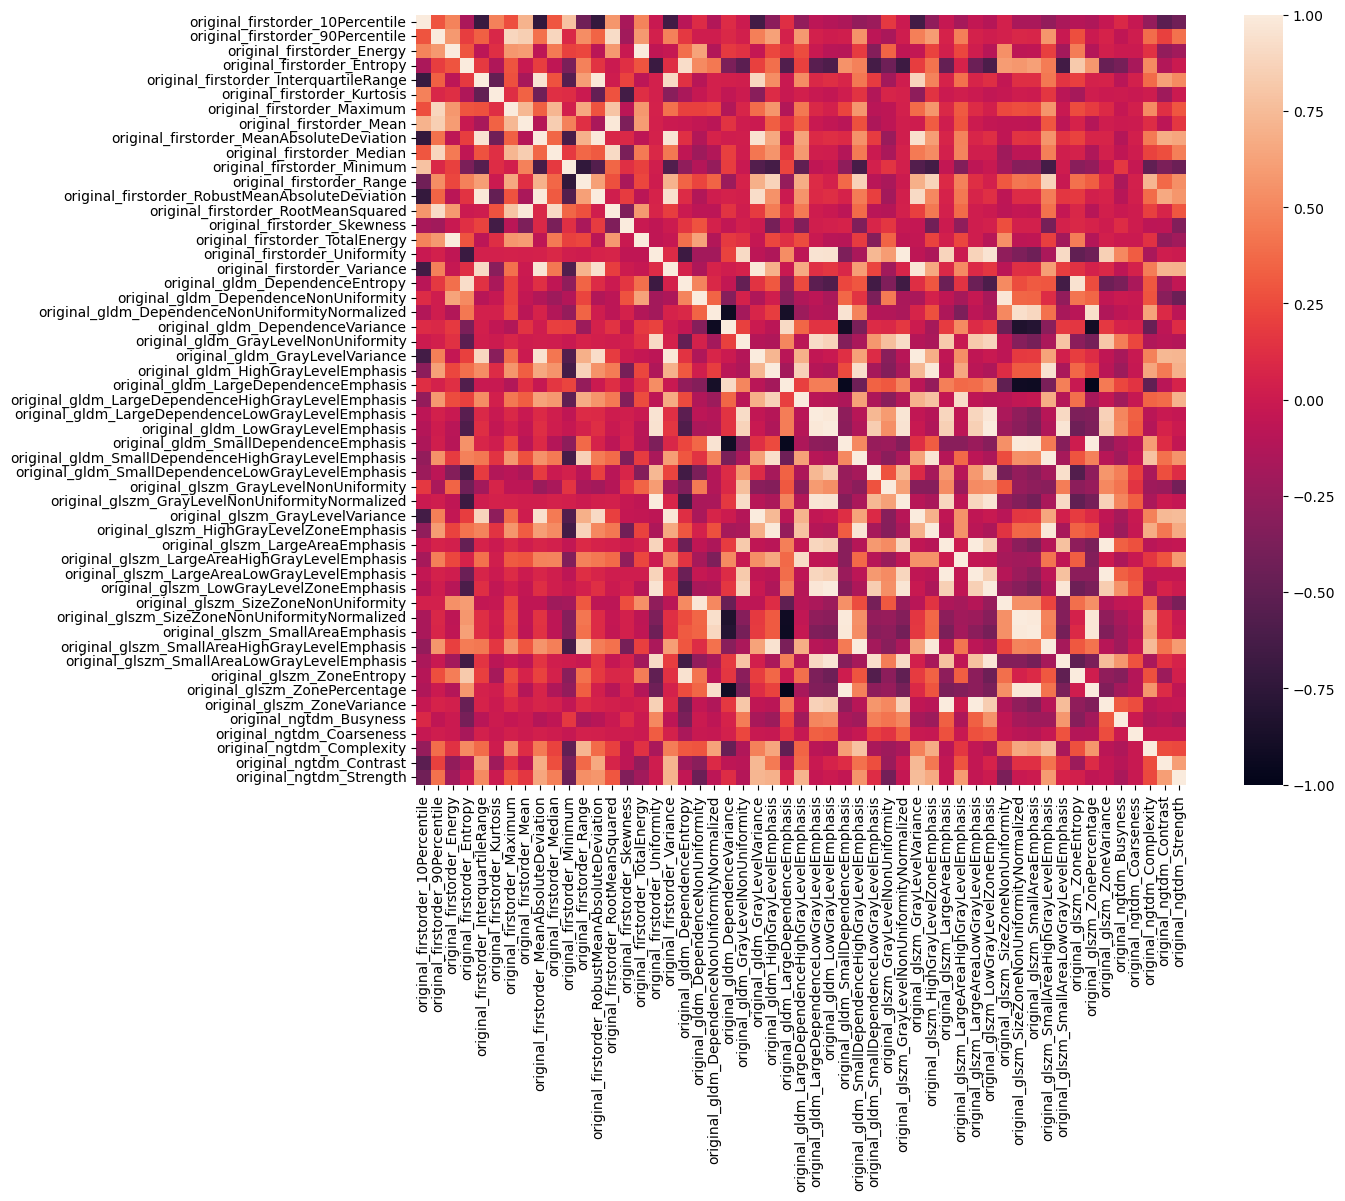

In [31]:
# import seaborn as sns
# import matplotlib.pyplot as plt

samples = np.zeros((len(im_n),len(feature_names)))
print(samples.shape)

for i in range(1,len(im_n)):
    # print(i)
    a = np.array([])
    
    for feature_name in feature_names:
        a = np.append(a, features[i][feature_name])
        # print(a)
    # print(a.shape)
    samples[i,:] = a
# print(samples)  
# Construct a pandas dataframe from the samples
d = pd.DataFrame(data=samples, columns=feature_names)
corr = d.corr()
print(len(d))
# Set up the matplotlib figure, make it big!
f, ax = plt.subplots(figsize=(15, 10))


# Draw the heatmap using seaborn
sns.heatmap(corr, vmin= -1, vmax=1, square = True)
# plt.savefig('../presentation/heatmap.png', dpi= 100)
plt.show()

In [32]:
# pd.read_csv('../dataset/PyRadiomics_files/radiomics_external.csv')

In [33]:
data_pd = pd.read_csv('../dataset/metadata/HAM10000_metadata.csv')
data_pd.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [34]:
dp = data_pd[['image_id', 'dx']]
dp

,image_id,dx
0,ISIC_0027419,bkl
1,ISIC_0025030,bkl
2,ISIC_0026769,bkl
3,ISIC_0025661,bkl
4,ISIC_0031633,bkl
...,...,...
10010,ISIC_0033084,akiec
10011,ISIC_0033550,akiec
10012,ISIC_0033536,akiec
10013,ISIC_0032854,akiec


In [35]:
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0032214'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0032215'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0025277'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0029819'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0034047'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0029609'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0025061'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0028361'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0026042'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0030687'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0025987'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0030006'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0031070'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0028110'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0033377'].index, inplace = True)
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0033031'].index, inplace = True)

print(len(data_pd))
d_radiomics = dp.merge(d.set_index(data_pd['image_id']), on = 'image_id')
d_radiomics.to_csv('../dataset/PyRadiomics_files/radiomics_combo_ring.csv')
X = d_radiomics.drop(['image_id', 'dx'], axis = 1)
# dp = data_pd[['image_id', 'dx']]
# print(dp)
y = d_radiomics['dx']

9999


In [ ]:
codes = {'akiec':0, 'bcc':1, 'bkl':2, 'df':3, 'mel':4, 'nv':5, 'vasc':6}

y = y.map(codes) 


In [ ]:
from imblearn.over_sampling import RandomOverSampler    # to balance an imbalanced dataset.
# Initializing the RandomOverSampler object with a specified random_state for reproducibility.
ROS = RandomOverSampler(random_state = 42)

# This method generates a balanced dataset by oversampling the minority class
x_resampled, y_resampled = ROS.fit_resample(X, y)


In [ ]:
x_resampled.isnull().sum()


original_firstorder_10Percentile                      0
original_firstorder_90Percentile                      0
original_firstorder_Energy                            0
original_firstorder_Entropy                           0
original_firstorder_InterquartileRange                0
original_firstorder_Kurtosis                          0
original_firstorder_Maximum                           0
original_firstorder_Mean                              0
original_firstorder_MeanAbsoluteDeviation             0
original_firstorder_Median                            0
original_firstorder_Minimum                           0
original_firstorder_Range                             0
original_firstorder_RobustMeanAbsoluteDeviation       0
original_firstorder_RootMeanSquared                   0
original_firstorder_Skewness                          0
original_firstorder_TotalEnergy                       0
original_firstorder_Uniformity                        0
original_firstorder_Variance                    

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculate VIF for each feature

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(d.values, i) for i in range(d.shape[1])]

vif["features"] = d.columns

# print VIF values

print(vif)

/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


      VIF Factor                                           features
0   1.012696e+04                   original_firstorder_10Percentile
1   3.683513e+04                   original_firstorder_90Percentile
2            inf                         original_firstorder_Energy
3   9.803424e+04                        original_firstorder_Entropy
4   7.700190e+02             original_firstorder_InterquartileRange
5   1.258217e+01                       original_firstorder_Kurtosis
6            inf                        original_firstorder_Maximum
7   1.424466e+06                           original_firstorder_Mean
8   2.919001e+03          original_firstorder_MeanAbsoluteDeviation
9   3.264885e+04                         original_firstorder_Median
10           inf                        original_firstorder_Minimum
11           inf                          original_firstorder_Range
12  2.040264e+03    original_firstorder_RobustMeanAbsoluteDeviation
13  1.347368e+06                original_firstor

In [ ]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression

# define number of features to keep

k = 30

# perform feature selection

X_new = SelectKBest(f_regression, k=k).fit_transform(d, y)

# get feature names of selected features

selected_features = d.columns[SelectKBest(f_regression, k=k).fit(d, y).get_support()]

# print selected features

print(selected_features)

Index(['original_firstorder_Entropy', 'original_firstorder_InterquartileRange',
       'original_firstorder_Kurtosis',
       'original_firstorder_MeanAbsoluteDeviation',
       'original_firstorder_Minimum', 'original_firstorder_Range',
       'original_firstorder_RobustMeanAbsoluteDeviation',
       'original_firstorder_Variance', 'original_gldm_DependenceNonUniformity',
       'original_gldm_DependenceNonUniformityNormalized',
       'original_gldm_DependenceVariance', 'original_gldm_GrayLevelVariance',
       'original_gldm_HighGrayLevelEmphasis',
       'original_gldm_LargeDependenceEmphasis',
       'original_gldm_LargeDependenceHighGrayLevelEmphasis',
       'original_gldm_SmallDependenceEmphasis',
       'original_gldm_SmallDependenceHighGrayLevelEmphasis',
       'original_glszm_GrayLevelVariance',
       'original_glszm_HighGrayLevelZoneEmphasis',
       'original_glszm_LargeAreaHighGrayLevelEmphasis',
       'original_glszm_LowGrayLevelZoneEmphasis',
       'original_glszm_S

In [ ]:
xx = x_resampled[selected_features]
print(xx.head())

   original_firstorder_Entropy  original_firstorder_InterquartileRange  \
0                     0.000000                                     0.0   
1                     4.669066                                    18.0   
2                     4.916045                                    21.0   
3                     4.518541                                    30.0   
4                     4.433368                                    15.0   

   original_firstorder_Kurtosis  original_firstorder_MeanAbsoluteDeviation  \
0                      0.000000                                   0.000000   
1                      2.506568                                  10.377666   
2                      2.720856                                  12.444749   
3                      1.472805                                  14.983507   
4                      2.713476                                   8.615019   

   original_firstorder_Minimum  original_firstorder_Range  \
0                        

In [ ]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)


In [ ]:


#scaling and centering the data
sc = StandardScaler()
X_train_scaled_n = sc.fit_transform(X_train_n)
X_test_scaled_n = sc.transform(X_test_n)

In [ ]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)

In [ ]:
svm.fit(X_train_scaled_n,y_train_n.values)


SVC(gamma=0.5)

In [ ]:


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

7508 7508 1877 1877
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       253
           1       0.92      0.86      0.89       274
           2       0.84      0.61      0.71       272
           3       0.98      1.00      0.99       268
           4       0.74      0.61      0.67       260
           5       0.48      0.70      0.57       262
           6       0.99      0.99      0.99       288

    accuracy                           0.82      1877
   macro avg       0.84      0.82      0.82      1877
weighted avg       0.84      0.82      0.82      1877



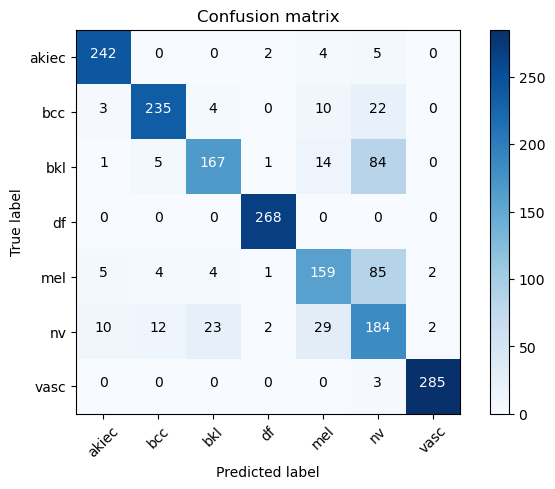

In [ ]:
x_val_n, x_test_nn, y_val_n, y_test_nn = train_test_split(X_test_scaled_n, y_test_n, test_size=0.2, random_state=42 )  
print(len(x_val_n), len(y_val_n),len(x_test_nn),len(y_test_nn))
svm.fit(x_val_n, y_val_n.values)
y_pre_nn = svm.predict(x_test_nn)
accuracy_score(y_test_nn, y_pre_nn)
# xp = classification_report(y_test_nn,y_pre_nn)
xp = confusion_matrix(y_test_nn,y_pre_nn)
print(classification_report(y_test_nn, y_pre_nn))
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
plot_confusion_matrix(xp, plot_labels)
# plt.savefig('../presentation/conf_mat_svm_rbf_d_50.png', dpi = 100)
plt.show()

In [ ]:
clf = RandomForestClassifier( random_state=42)

In [ ]:
param_grid = { 
    # 'n_estimators': [200, 500],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth' : [2,4,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
# .fit(x_train, y_train)

# xp = classification_report(y_test_nn,y_pre_nn)

# clf.fit(X, y)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       253
           1       0.87      0.90      0.88       274
           2       0.76      0.69      0.73       272
           3       0.99      1.00      0.99       268
           4       0.64      0.67      0.66       260
           5       0.54      0.49      0.51       262
           6       0.98      1.00      0.99       288

    accuracy                           0.82      1877
   macro avg       0.81      0.82      0.81      1877
weighted avg       0.81      0.82      0.82      1877



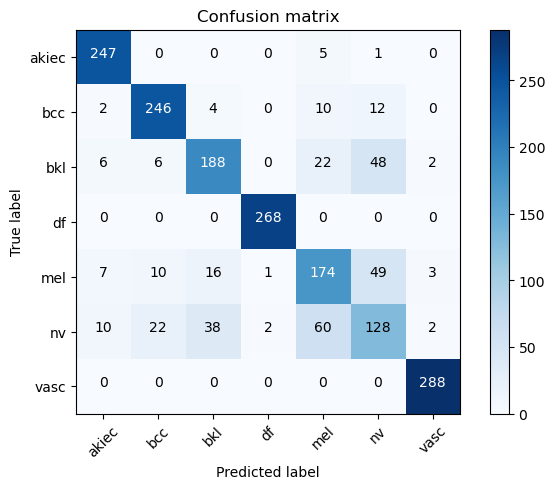

In [ ]:
clf.fit(x_val_n, y_val_n.values)
y_pre_nn = clf.predict(x_test_nn)
accuracy_score(y_test_nn, y_pre_nn)
xp = confusion_matrix(y_test_nn,y_pre_nn)
print(classification_report(y_test_nn, y_pre_nn))
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
plot_confusion_matrix(xp, plot_labels)
# plt.savefig('../presentation/conf_mat_rfc_d50.png', dpi = 100)
plt.show()